In [1]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import nbformat
from PIL import Image
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/data/animals'

In [4]:
catagories = []
for c in os.listdir(data_path):
    catagories.append(c)
print(catagories)

['panda', 'dogs', 'cats']


In [ ]:
data = []
for c in catagories:
  path = os.path.join(data_path, c)

  class_num = catagories.index(c)

  for img in tqdm(os.listdir(path)):
    img_arr = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)

    img_arr = cv.resize(img_arr, (32, 32), interpolation=cv.INTER_AREA)

    data.append([img_arr, class_num])

print(len(data))

100%|██████████| 1052/1052 [00:25<00:00, 40.61it/s] 

3185


In [6]:
random.shuffle(data)

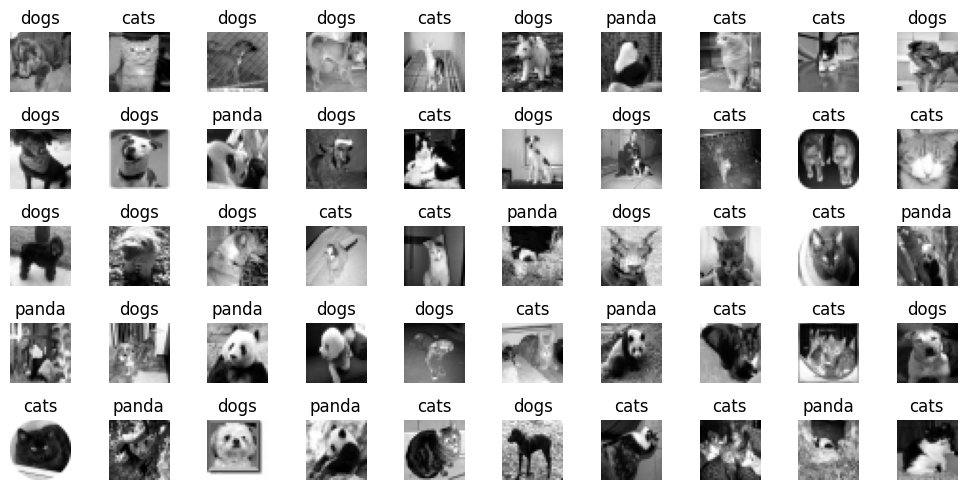

In [ ]:
plt.figure(figsize=(10, 5))

for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.imshow(data[i][0], cmap='gray')
  plt.title(catagories[data[i][1]])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
f1 = data[0:600]
f2 = data[600:1200]
f3 = data[1200:1800]
f4 = data[1800:2400]
f5 = data[2400:3000]

In [ ]:
def calc_l1_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def calc_l2_distance(x1, x2):
    return np.sqrt(np.sum(np.abs(x1 - x2)**2))

In [10]:
k_max = 20
def calc_distance(train, val):
  # To store the distances
  l1_result = []
  l2_result = []

  for v in tqdm(val):
    temp = []
    for t in train:
      temp.append([v[1],  t[1], {"l1": calc_l1_distance(v[0], t[0]), "l2": calc_l2_distance(v[0], t[0])}])

    temp.sort(key=lambda x: x[2]["l1"])
    l1_result.append(temp[:k_max])

    temp.sort(key=lambda x: x[2]["l2"])
    l2_result.append(temp[:k_max])

  return [l1_result, l2_result]

In [11]:
k_max = 20
def calc_accuracy(distance_val, distance_label):
    k_acc = []
    for k in range(1, k_max+1):
        img_acc = 0

        for img_dist in distance_val:
            top_k = img_dist[:k]

            same_class_img = [t_k for t_k in top_k if t_k[0] == t_k[1]]

            if k % 2 != 0:
                if (k // 2) < len(same_class_img):
                    img_acc += 1
            else:
                diff_class_img = [t_k for t_k in top_k if t_k[0] != t_k[1]]
                if len(same_class_img) > len(diff_class_img):
                    img_acc += 1
                elif len(same_class_img) == len(diff_class_img):
                    same_class_dist = sum([s_c[2][distance_label] for s_c in same_class_img])
                    diff_class_dist = sum([d_c[2][distance_label] for d_c in diff_class_img])
                    if same_class_dist > diff_class_dist:
                        img_acc += 1

        k_acc.append(img_acc/len(distance_val))
    return k_acc

In [ ]:
fold_distance = []

for i in range(5):
    if i == 0:
        train = f1 + f2 + f3 + f4
        validation = f5
    elif i == 1:
        train = f1 + f2 + f3 + f5
        validation = f4
    elif i == 2:
        train = f1 + f2 + f4 + f5
        validation = f3
    elif i == 3:
        train = f1 + f3 + f4 + f5
        validation = f2
    elif i == 4:
        train = f2 + f3 + f4 + f5
        validation = f1

    fold_distance.append(calc_distance(train, validation))

len(fold_distance[0][0])

100%|██████████| 600/600 [00:25<00:00, 23.94it/s]


600

# **PLOTTING**

In [13]:
accuracies = []

for result in fold_distance:
    l1_accuracy = calc_accuracy(result[0], "l1")
    l2_accuracy = calc_accuracy(result[1], "l2")
    accuracies.append([l1_accuracy, l2_accuracy])

accuracies

[[[0.49333333333333335,
   0.43,
   0.41333333333333333,
   0.395,
   0.38666666666666666,
   0.35333333333333333,
   0.3516666666666667,
   0.32,
   0.32,
   0.2833333333333333,
   0.285,
   0.25166666666666665,
   0.26166666666666666,
   0.25166666666666665,
   0.2683333333333333,
   0.24333333333333335,
   0.265,
   0.24333333333333335,
   0.25333333333333335,
   0.23166666666666666],
  [0.48833333333333334,
   0.4533333333333333,
   0.435,
   0.39,
   0.39166666666666666,
   0.38166666666666665,
   0.38,
   0.38,
   0.36833333333333335,
   0.37166666666666665,
   0.36,
   0.335,
   0.31333333333333335,
   0.2866666666666667,
   0.295,
   0.295,
   0.2866666666666667,
   0.2683333333333333,
   0.27666666666666667,
   0.27]],
 [[0.47,
   0.43333333333333335,
   0.3983333333333333,
   0.37,
   0.3383333333333333,
   0.31333333333333335,
   0.305,
   0.275,
   0.2866666666666667,
   0.2633333333333333,
   0.2633333333333333,
   0.235,
   0.25166666666666665,
   0.22833333333333333,
   

# Result and Analysis

# **L1 Accuracy**

Max Accuracy for L1 in fold=1 is : 0.4933
Max Accuracy for L1 in fold=2 is : 0.47
Max Accuracy for L1 in fold=3 is : 0.4983
Max Accuracy for L1 in fold=4 is : 0.4983
Max Accuracy for L1 in fold=5 is : 0.45


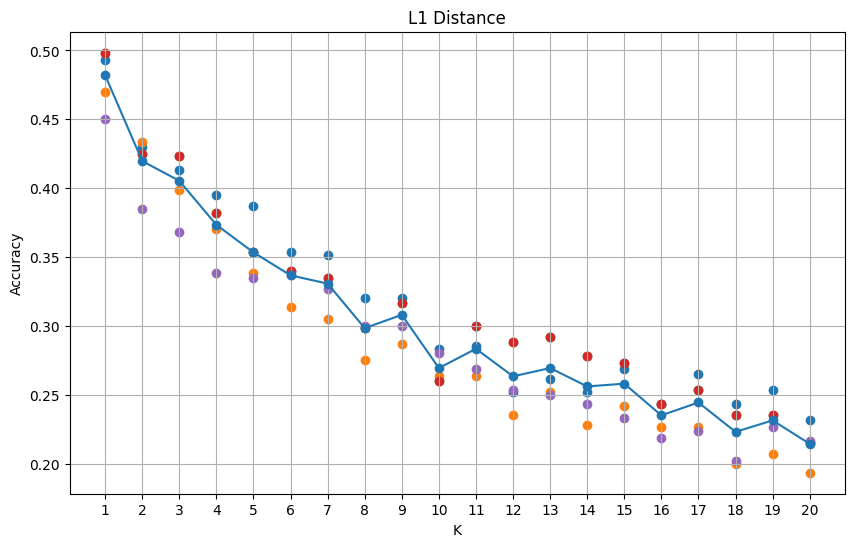

In [ ]:
i = 1
for fold in accuracies:
  y = fold[0]
  max_val = [round(y, 4) for y in y]
  print(f"Max Accuracy for L1 in fold={i} is : {max(max_val)}")
  i += 1

x_list = list(range(1, k_max+1))
plt.figure(figsize=(10, 6))

for fold in accuracies:
  y_list = fold[0]
  numbers = y_list
  plt.scatter(x_list, y_list)


arr = []
for i in range(k_max):
  arr.append([fold[0][i] for fold in accuracies])
trend = [np.mean(a) for a in arr]

plt.errorbar(x_list, trend, fmt='-o')
plt.title('L1 Distance')
plt.xticks(x_list)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()




# **L2** **Accuracy**

Max Accuracy for L2 in fold=1 is : 0.4883
Max Accuracy for L2 in fold=2 is : 0.49
Max Accuracy for L2 in fold=3 is : 0.45
Max Accuracy for L2 in fold=4 is : 0.45
Max Accuracy for L2 in fold=5 is : 0.4667


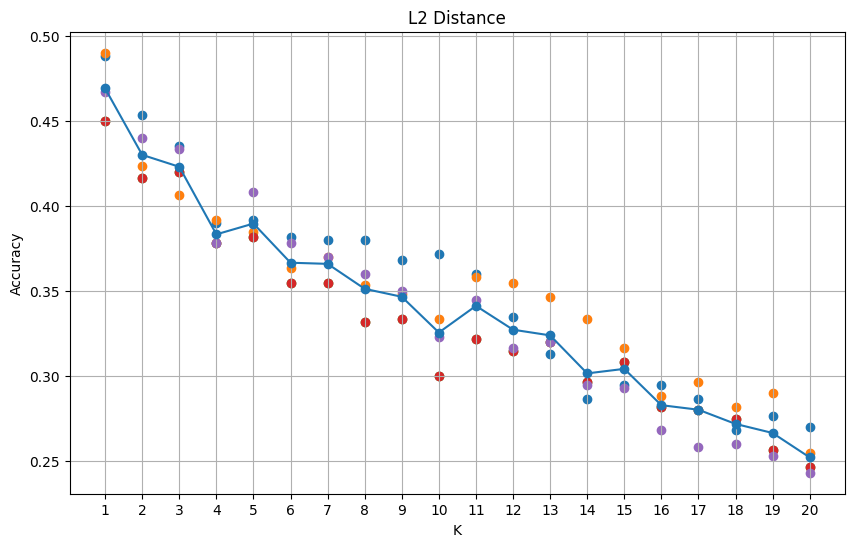

In [ ]:
i = 1
for fold in accuracies:
  y = fold[1]
  max_val = [round(y, 4) for y in y]
  print(f"Max Accuracy for L2 in fold={i} is : {max(max_val)}")
  i += 1

x_list = list(range(1, k_max+1))
plt.figure(figsize=(10, 6))

for fold in accuracies:
  y_list = fold[1]
  numbers = y_list
  plt.scatter(x_list, y_list)


arr = []
for i in range(k_max):
  arr.append([fold[1][i] for fold in accuracies])
trend = [np.mean(a) for a in arr]

plt.errorbar(x_list, trend, fmt='-o')
plt.title('L2 Distance')
plt.xticks(x_list)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()




# **Discussion**

## 1. Trend with Increasing K  
Both Manhattan (L1) and Euclidean (L2) distances show a general decline in accuracy as *K* grows from 1 to 20. When *K* is small (1–4), the model relies on only the very nearest neighbors—which tend to be the most informative—so accuracy is highest. As *K* increases, votes from more distant (and often less relevant) neighbors dilute the signal, causing performance to drop.

## 2. L1 vs. L2 at Low K  
- **Peak Points:**  
  - L1 attains its highest accuracy (~44%) at *K* = 3 and *K* = 4.  
  - L2 briefly surpasses L1 around *K* = 2, reaching ~47%.  
- **Interpretation:**  
  - **L1’s robustness** to single‑pixel outliers makes it stable at *K* = 3–4 in this grayscale setting.  
  - **L2’s sensitivity** (due to squaring differences) can yield sharper discrimination when the nearest few neighbors share very similar overall intensity patterns, but it also drops off faster as *K* grows.

## 3. Feature Nature & Metric Suitability  
Our features are raw pixel intensities on 32×32 grayscale images—high‑dimensional and potentially noisy.  
- **L1 (Manhattan)** treats each pixel difference equally, making it less swayed by a few large-intensity artifacts.  
- **L2 (Euclidean)** emphasizes larger deviations (via squaring), which can be advantageous if those deviations correspond to meaningful class signals, but harmful if they stem from noise.

## 4. Limitations & Potential Improvements  
- **No Feature Scaling:** We directly compare raw intensities. Standardizing or normalizing features could particularly stabilize L2 distances.  
- **Alternative Metrics:** Other distances (e.g. Chebyshev, Mahalanobis) or learned metrics might better capture inter‑class variability.  
- **Small, Imbalanced Dataset:** With only 3 000 images, and potentially uneven class representation, k‑NN can overfit on the dense class regions. **Data augmentation** (rotations, flips, brightness shifts) could increase diversity and improve generalization.


# **Top 5 Predictions**

**For L1**

In [16]:
test_data = []

for i in range(100):
  test_data.append(data[i][0])

for img in test_data:
  distance1 = []

  for train_img, class_num in data:
    distance1.append([class_num, calc_l1_distance(img, train_img)])

  distance1.sort(key=lambda x: x[1])

  for i, [class_num, d] in enumerate(distance1[:5]):
    print(f"{i+1}=> Class : {catagories[class_num]} L1 distance : {d}")
  break

1=> Class : dogs L1 distance : 0
2=> Class : cats L1 distance : 72567
3=> Class : cats L1 distance : 78665
4=> Class : panda L1 distance : 78916
5=> Class : cats L1 distance : 78985


**For L2**

In [17]:
test_data = []

for i in range(100):
  test_data.append(data[i][0])

for img in test_data:
  distance2 = []

  for train_img, class_num in data:
    distance2.append([class_num, calc_l2_distance(img, train_img)])

  distance2.sort(key=lambda x: x[1])

  for i, [class_num, d] in enumerate(distance2[:5]):
    print(f"{i+1}=> Class : {catagories[class_num]} L2 distance : {d}")
  break

1=> Class : dogs L2 distance : 0.0
2=> Class : cats L2 distance : 306.9429914495524
3=> Class : panda L2 distance : 308.84462112848917
4=> Class : cats L2 distance : 309.3444681903977
5=> Class : cats L2 distance : 309.3444681903977


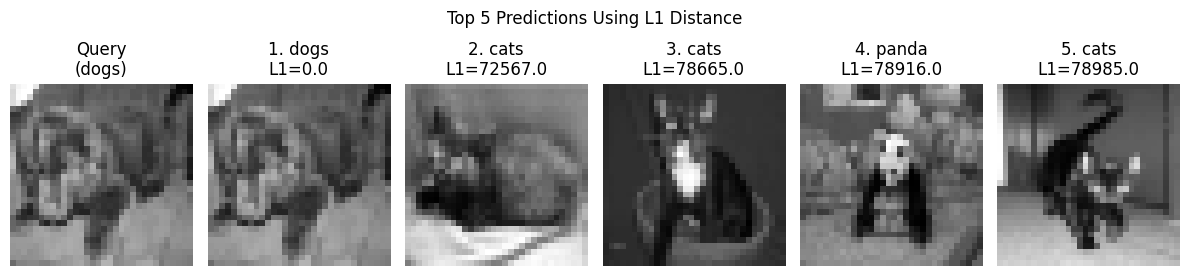

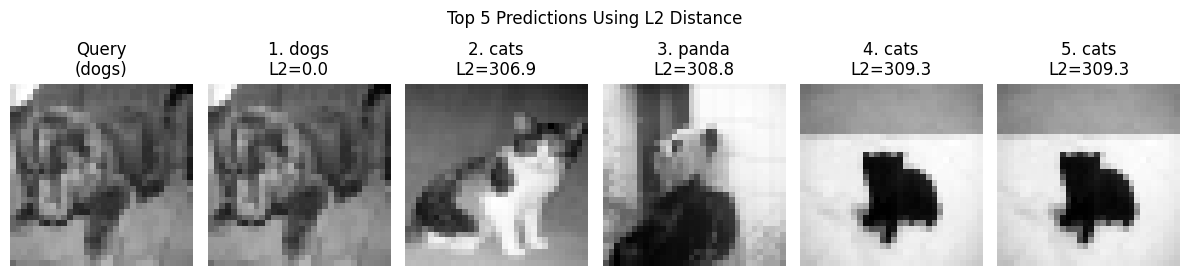

In [ ]:
# Get test image
test_img = data[0][0]
test_label = data[0][1]

# Compute L1 distances
l1_neighbors = []
for train_img, class_num in data:
    dist = calc_l1_distance(test_img, train_img)
    l1_neighbors.append([train_img, class_num, dist])

l1_neighbors.sort(key=lambda x: x[2])
top5_l1 = l1_neighbors[:5]

# Compute L2 distances
l2_neighbors = []
for train_img, class_num in data:
    dist = calc_l2_distance(test_img, train_img)
    l2_neighbors.append([train_img, class_num, dist])

l2_neighbors.sort(key=lambda x: x[2])
top5_l2 = l2_neighbors[:5]

# Plot L1 predictions
plt.figure(figsize=(12, 3))
plt.subplot(1, 6, 1)
plt.imshow(test_img, cmap='gray')
plt.title(f"Query\n({catagories[test_label]})")
plt.axis('off')
for i, (img, label, dist) in enumerate(top5_l1):
    plt.subplot(1, 6, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f"{i+1}. {catagories[label]}\nL1={dist:.1f}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Top 5 Predictions Using L1 Distance", y=1.05)
plt.show()

# Plot L2 predictions
plt.figure(figsize=(12, 3))
plt.subplot(1, 6, 1)
plt.imshow(test_img, cmap='gray')
plt.title(f"Query\n({catagories[test_label]})")
plt.axis('off')
for i, (img, label, dist) in enumerate(top5_l2):
    plt.subplot(1, 6, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f"{i+1}. {catagories[label]}\nL2={dist:.1f}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Top 5 Predictions Using L2 Distance", y=1.05)
plt.show()
